In [1]:
from qiskit import *
# Warning: you need to have utils.py in the notebook working directory
# You can se it with !pwd and change it with !cd (or using os module)
%run utils.py

In [2]:
# N : The size of the Cnot gate
# Change it and run all the cells below

N = 4

In [3]:
Cnot4 = QuantumCircuit(N * 2)

Cnot4.x(range(N))  # Init all the control bits value at state |1>
# Set the first control bit at superposed state |+>
# in order to see the result of the to possible layer states |0111..11> and |1111..11>
Cnot4.h(0) 


build_cnot(Cnot4, N)
Cnot4.measure_all()

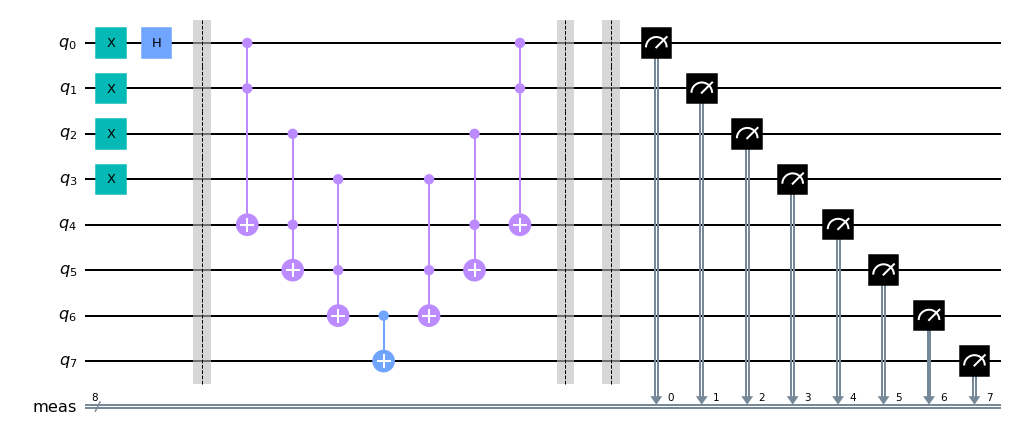

In [4]:
Cnot4.draw("mpl")

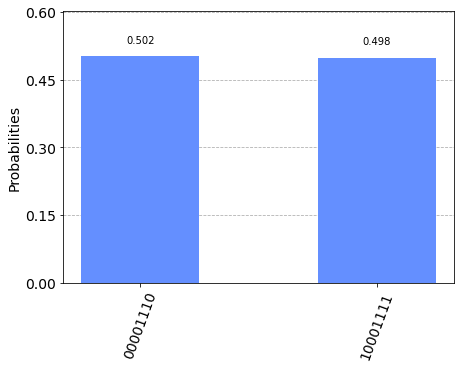

In [5]:
# Mesearment general methode from Qiskit examples
aer_sim = Aer.get_backend('aer_simulator')
transpiled_grover_circuit = transpile(Cnot4, aer_sim)
qobj = assemble(transpiled_grover_circuit)
results = aer_sim.run(Cnot4).result()
counts = results.get_counts()
plot_histogram(counts)

# This should show two equiprobable results
# One correspond with the result of full controls bit at 1 the second with one fliped bit
# For the first one we see that the controled bit (top left bit) was switched to 1
# For the second is unchange
# Example with N = 4:
#  |11110000> -> |11110001>
#  |01110000> -> |01110000>
# Note: the three 0 bits one the middle are (J'ai oublié leur nom) bits